In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("NLP_Dataset1.csv")

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

In [11]:
df_sample = df.sample(n=100000, random_state=42)

In [12]:
selected_columns = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'ActivatedTimestamp', 'ClearedTimestamp', 'month', 'week', 'ResolutionTimeMinutes'
]
df_selected = df_sample[selected_columns]

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for column in ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# Define features and target
X = df_selected.drop(['ResolutionTimeMinutes', 'ActivatedTimestamp', 'ClearedTimestamp'], axis=1)
y = df_selected['ResolutionTimeMinutes']

/tmp/ipykernel_2292/3828475250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/3828475250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/3828475250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

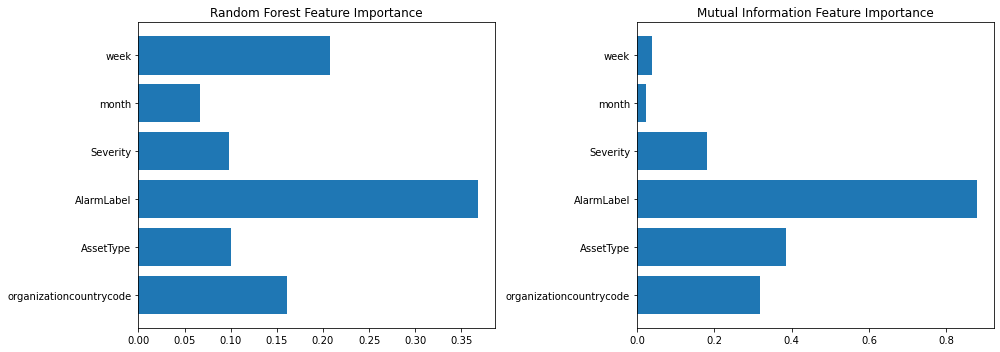

In [13]:
rf = RandomForestRegressor()
rf.fit(X, y)
rf_importances = rf.feature_importances_

# Mutual Information for feature importance
mi = mutual_info_regression(X, y)
mi_importances = mi

# Plot feature importances
feature_names = X.columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Feature Importance
axs[0].barh(feature_names, rf_importances)
axs[0].set_title('Random Forest Feature Importance')

# Mutual Information Feature Importance
axs[1].barh(feature_names, mi_importances)
axs[1].set_title('Mutual Information Feature Importance')

plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor

# Remove less important columns
important_features = ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity', 'month', 'week']
X = df_selected[important_features]

# Normalize the ResolutionTimeMinutes column
scaler = MinMaxScaler()
y_normalized = scaler.fit_transform(df_selected[['ResolutionTimeMinutes']])

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_normalized, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train.ravel())

# Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
nn_model.fit(X_train, y_train.ravel())

# Predict and evaluate on validation data
rf_pred_val = rf_model.predict(X_val)
nn_pred_val = nn_model.predict(X_val)

# Evaluate Random Forest
rf_mse_val = mean_squared_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Evaluate Neural Network
nn_mse_val = mean_squared_error(y_val, nn_pred_val)
nn_r2_val = r2_score(y_val, nn_pred_val)

print(f"Random Forest - Validation MSE: {rf_mse_val}, R²: {rf_r2_val}")
print(f"Neural Network - Validation MSE: {nn_mse_val}, R²: {nn_r2_val}")

# Predict on test data
rf_pred_test = rf_model.predict(X_test)
nn_pred_test = nn_model.predict(X_test)

# Evaluate Random Forest on test data
rf_mse_test = mean_squared_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)

# Evaluate Neural Network on test data
nn_mse_test = mean_squared_error(y_test, nn_pred_test)
nn_r2_test = r2_score(y_test, nn_pred_test)

print(f"Random Forest - Test MSE: {rf_mse_test}, R²: {rf_r2_test}")
print(f"Neural Network - Test MSE: {nn_mse_test}, R²: {nn_r2_test}")

# Convert predicted values back to original scale
rf_pred_test_original = scaler.inverse_transform(rf_pred_test.reshape(-1, 1))
nn_pred_test_original = scaler.inverse_transform(nn_pred_test.reshape(-1, 1))

# Display a few predicted values
print(f"Original Scale Predictions - Random Forest: {rf_pred_test_original[:5].ravel()}")
print(f"Original Scale Predictions - Neural Network: {nn_pred_test_original[:5].ravel()}")


Random Forest - Validation MSE: 5.5366006158348386e-05, R²: -0.3316400381472777
Neural Network - Validation MSE: 0.5054521697518128, R²: -12155.924317150475
Random Forest - Test MSE: 0.0002382707199409722, R²: -0.08333139853105354
Neural Network - Test MSE: 0.5013997457898863, R²: -2278.684587196602
Original Scale Predictions - Random Forest: [5.97385812 4.26698154 1.1023522  0.19973791 3.44292817]
Original Scale Predictions - Neural Network: [173444.17022788  10997.14443658 116292.83862791 262498.16627747
  96899.478182  ]


In [5]:
import numpy as np
import xgboost as xgb

print(np.__version__)
print(xgb.__version__)

1.23.5
2.0.3


/tmp/ipykernel_2292/1988221402.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/1988221402.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/1988221402.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

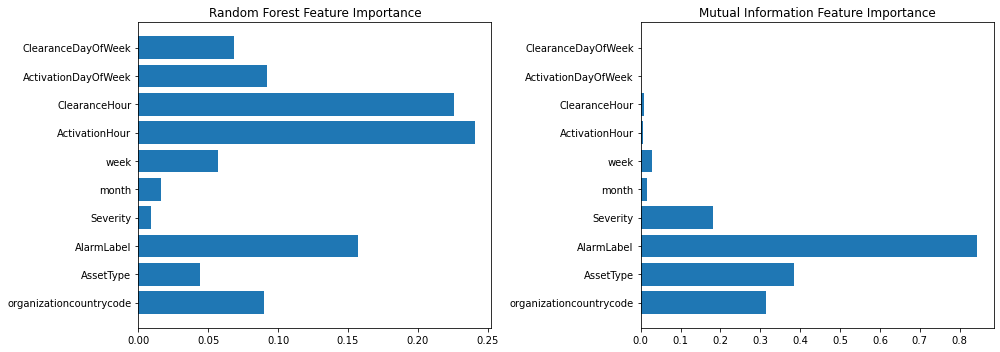

Random Forest - Validation MSE: 0.0014553117983205947, R²: 0.6578449865910176
Neural Network - Validation MSE: 0.0012177967371169642, R²: 0.713686606953571
Random Forest - Test MSE: 0.0013751059245046735, R²: 0.6753424359110427
Neural Network - Test MSE: 0.0013445327097768823, R²: 0.6825606619713143


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from scipy import stats



# Select relevant columns
selected_columns = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'ActivatedTimestamp', 'ClearedTimestamp', 'month', 'week', 'ResolutionTimeMinutes'
]
df_selected = df_sample[selected_columns]

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for column in ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# Convert timestamps to datetime and extract features
df_selected['ActivatedTimestamp'] = pd.to_datetime(df_selected['ActivatedTimestamp'])
df_selected['ClearedTimestamp'] = pd.to_datetime(df_selected['ClearedTimestamp'])
df_selected['ActivationHour'] = df_selected['ActivatedTimestamp'].dt.hour
df_selected['ClearanceHour'] = df_selected['ClearedTimestamp'].dt.hour
df_selected['ActivationDayOfWeek'] = df_selected['ActivatedTimestamp'].dt.dayofweek
df_selected['ClearanceDayOfWeek'] = df_selected['ClearedTimestamp'].dt.dayofweek
df_selected['ResolutionTime'] = (df_selected['ClearedTimestamp'] - df_selected['ActivatedTimestamp']).dt.total_seconds() / 60

# Remove rows with invalid resolution times
df_selected = df_selected[(df_selected['ResolutionTime'] >= 0) & (df_selected['ResolutionTime'] <= 10000)]

# Remove outliers
z_scores = np.abs(stats.zscore(df_selected['ResolutionTimeMinutes']))
df_selected = df_selected[z_scores < 3]

# Normalize the ResolutionTimeMinutes column
scaler = MinMaxScaler()
df_selected['ResolutionTimeMinutes'] = scaler.fit_transform(df_selected[['ResolutionTimeMinutes']])

# Define features and target
features = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'month', 'week', 'ActivationHour', 'ClearanceHour',
    'ActivationDayOfWeek', 'ClearanceDayOfWeek'
]
X = df_selected[features]
y = df_selected['ResolutionTimeMinutes']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Mutual Information for feature importance
mi = mutual_info_regression(X_train, y_train)
mi_importances = mi

# Plot feature importances
feature_names = X_train.columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Feature Importance
axs[0].barh(feature_names, rf_importances)
axs[0].set_title('Random Forest Feature Importance')

# Mutual Information Feature Importance
axs[1].barh(feature_names, mi_importances)
axs[1].set_title('Mutual Information Feature Importance')

plt.tight_layout()
plt.show()

# Remove less important columns
important_features = ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity', 'month', 'week', 'ActivationHour', 'ClearanceHour']
X_train = X_train[important_features]
X_val = X_val[important_features]
X_test = X_test[important_features]

# Model tuning and training
# Random Forest Regressor with GridSearchCV
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Neural Network Regressor with GridSearchCV
nn_param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'max_iter': [300, 500]
}
nn_grid = GridSearchCV(MLPRegressor(random_state=42), nn_param_grid, cv=3, n_jobs=-1)
nn_grid.fit(X_train, y_train)

# Predict and evaluate on validation data
rf_pred_val = rf_grid.best_estimator_.predict(X_val)
nn_pred_val = nn_grid.best_estimator_.predict(X_val)

# Evaluate Random Forest
rf_mse_val = mean_squared_error(y_val, rf_pred_val)
rf_r2_val = r2_score(y_val, rf_pred_val)

# Evaluate Neural Network
nn_mse_val = mean_squared_error(y_val, nn_pred_val)
nn_r2_val = r2_score(y_val, nn_pred_val)

print(f"Random Forest - Validation MSE: {rf_mse_val}, R²: {rf_r2_val}")
print(f"Neural Network - Validation MSE: {nn_mse_val}, R²: {nn_r2_val}")

# Predict on test data
rf_pred_test = rf_grid.best_estimator_.predict(X_test)
nn_pred_test = nn_grid.best_estimator_.predict(X_test)

# Evaluate Random Forest on test data
rf_mse_test = mean_squared_error(y_test, rf_pred_test)
rf_r2_test = r2_score(y_test, rf_pred_test)

# Evaluate Neural Network on test data
nn_mse_test = mean_squared_error(y_test, nn_pred_test)
nn_r2_test = r2_score(y_test, nn_pred_test)

print(f"Random Forest - Test MSE: {rf_mse_test}, R²: {rf_r2_test}")
print(f"Neural Network - Test MSE: {nn_mse_test}, R²: {nn_r2_test}")

# Convert predicted values back to original scale
rf_pred_test_original = scaler.inverse_transform(rf_pred_test.reshape(-1, 1))
nn_pred_test_original = scaler.inverse_transform(nn_pred_test.reshape(-1, 1))




In [17]:
##below is more optimal code

In [19]:
pip install optuna

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 380 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 2.6 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_2292/954963820.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/954963820.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/954963820.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

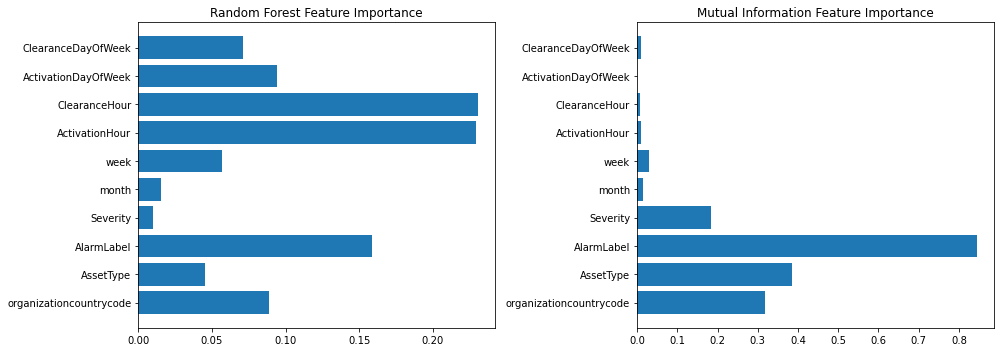

[I 2024-06-23 13:59:07,826] A new study created in memory with name: no-name-aea0ee09-f32c-41a2-9842-0c87dc616b1b
/home/patil.anjali/.local/lib/python3.9/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100,) which is of type tuple.
  warnings.warn(message)
/home/patil.anjali/.local/lib/python3.9/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (100, 50) which is of type tuple.
  warnings.warn(message)
/home/patil.anjali/.local/lib/python3.9/site-packages/optuna/distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains (150, 75) which is of type tuple.
  warnings.warn(message)
/home/patil.anjali/.local/lib/python3.9/sit

ValueError: Solver produced non-finite parameter weights. The input data may contain large values and need to be preprocessed.

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from scipy import stats
import optuna


# Sample the data for quick processing
df_sample = df.sample(n=100000, random_state=42)

# Select relevant columns
selected_columns = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'ActivatedTimestamp', 'ClearedTimestamp', 'month', 'week', 'ResolutionTimeMinutes'
]
df_selected = df_sample[selected_columns]

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for column in ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# Convert timestamps to datetime and extract features
df_selected['ActivatedTimestamp'] = pd.to_datetime(df_selected['ActivatedTimestamp'])
df_selected['ClearedTimestamp'] = pd.to_datetime(df_selected['ClearedTimestamp'])
df_selected['ActivationHour'] = df_selected['ActivatedTimestamp'].dt.hour
df_selected['ClearanceHour'] = df_selected['ClearedTimestamp'].dt.hour
df_selected['ActivationDayOfWeek'] = df_selected['ActivatedTimestamp'].dt.dayofweek
df_selected['ClearanceDayOfWeek'] = df_selected['ClearedTimestamp'].dt.dayofweek
df_selected['ResolutionTime'] = (df_selected['ClearedTimestamp'] - df_selected['ActivatedTimestamp']).dt.total_seconds() / 60

# Remove rows with invalid resolution times
df_selected = df_selected[(df_selected['ResolutionTime'] >= 0) & (df_selected['ResolutionTime'] <= 10000)]

# Remove outliers
z_scores = np.abs(stats.zscore(df_selected['ResolutionTimeMinutes']))
df_selected = df_selected[z_scores < 3]

# Normalize the ResolutionTimeMinutes column
scaler = MinMaxScaler()
df_selected['ResolutionTimeMinutes'] = scaler.fit_transform(df_selected[['ResolutionTimeMinutes']])

# Define features and target
features = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'month', 'week', 'ActivationHour', 'ClearanceHour',
    'ActivationDayOfWeek', 'ClearanceDayOfWeek'
]
X = df_selected[features]
y = df_selected['ResolutionTimeMinutes']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Mutual Information for feature importance
mi = mutual_info_regression(X_train, y_train)
mi_importances = mi

# Plot feature importances
feature_names = X_train.columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Feature Importance
axs[0].barh(feature_names, rf_importances)
axs[0].set_title('Random Forest Feature Importance')

# Mutual Information Feature Importance
axs[1].barh(feature_names, mi_importances)
axs[1].set_title('Mutual Information Feature Importance')

plt.tight_layout()
plt.show()

# Remove less important columns
important_features = ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity', 'month', 'week', 'ActivationHour', 'ClearanceHour']
X_train = X_train[important_features]
X_val = X_val[important_features]
X_test = X_test[important_features]

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    hidden_layer_sizes = tuple(trial.suggest_categorical('hidden_layer_sizes', [(100,), (100, 50), (150, 75), (200, 100)]))
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    max_iter = trial.suggest_int('max_iter', 300, 500)

    # Create and train the model
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=max_iter,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Predict and evaluate on validation data
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    
    return mse

# Run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Get the best hyperparameters
best_params = study.best_params
print("Best hyperparameters:", best_params)

# Train the final model using the best hyperparameters
best_nn_model = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    alpha=best_params['alpha'],
    learning_rate=best_params['learning_rate'],
    max_iter=best_params['max_iter'],
    random_state=42
)
best_nn_model.fit(X_train, y_train)

# Predict and evaluate on test data
nn_pred_test = best_nn_model.predict(X_test)
nn_mse_test = mean_squared_error(y_test, nn_pred_test)
nn_r2_test = r2_score(y_test, nn_pred_test)

print(f"Neural Network - Test MSE: {nn_mse_test}, R²: {nn_r2_test}")

# Convert predicted values back to original scale
nn_pred_test_original = scaler.inverse_transform(nn_pred_test.reshape(-1, 1))

# Display a few predicted values
print(f"Original Scale Predictions - Neural Network: {nn_pred_test_original[:5].ravel()}")


In [ ]:
# if we want to remove above warnings:

/tmp/ipykernel_2292/2684318520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/2684318520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[column] = le.fit_transform(df_selected[column])
/tmp/ipykernel_2292/2684318520.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

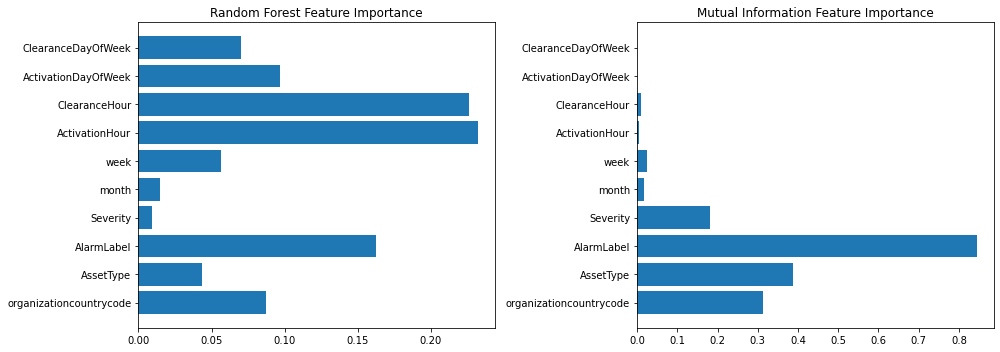

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from scipy import stats
import optuna



# Select relevant columns
selected_columns = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'ActivatedTimestamp', 'ClearedTimestamp', 'month', 'week', 'ResolutionTimeMinutes'
]
df_selected = df_sample[selected_columns]

# Convert categorical columns to numerical using Label Encoding
label_encoders = {}
for column in ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

# Convert timestamps to datetime and extract features
df_selected['ActivatedTimestamp'] = pd.to_datetime(df_selected['ActivatedTimestamp'])
df_selected['ClearedTimestamp'] = pd.to_datetime(df_selected['ClearedTimestamp'])
df_selected['ActivationHour'] = df_selected['ActivatedTimestamp'].dt.hour
df_selected['ClearanceHour'] = df_selected['ClearedTimestamp'].dt.hour
df_selected['ActivationDayOfWeek'] = df_selected['ActivatedTimestamp'].dt.dayofweek
df_selected['ClearanceDayOfWeek'] = df_selected['ClearedTimestamp'].dt.dayofweek
df_selected['ResolutionTime'] = (df_selected['ClearedTimestamp'] - df_selected['ActivatedTimestamp']).dt.total_seconds() / 60

# Remove rows with invalid resolution times
df_selected = df_selected[(df_selected['ResolutionTime'] >= 0) & (df_selected['ResolutionTime'] <= 10000)]

# Remove outliers
z_scores = np.abs(stats.zscore(df_selected['ResolutionTimeMinutes']))
df_selected = df_selected[z_scores < 3]

# Normalize the ResolutionTimeMinutes column
scaler = MinMaxScaler()
df_selected['ResolutionTimeMinutes'] = scaler.fit_transform(df_selected[['ResolutionTimeMinutes']])

# Define features and target
features = [
    'organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity',
    'month', 'week', 'ActivationHour', 'ClearanceHour',
    'ActivationDayOfWeek', 'ClearanceDayOfWeek'
]
X = df_selected[features]
y = df_selected['ResolutionTimeMinutes']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Feature importance using Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_importances = rf.feature_importances_

# Mutual Information for feature importance
mi = mutual_info_regression(X_train, y_train)
mi_importances = mi

# Plot feature importances
feature_names = X_train.columns
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Random Forest Feature Importance
axs[0].barh(feature_names, rf_importances)
axs[0].set_title('Random Forest Feature Importance')

# Mutual Information Feature Importance
axs[1].barh(feature_names, mi_importances)
axs[1].set_title('Mutual Information Feature Importance')

plt.tight_layout()
plt.show()

# Remove less important columns
important_features = ['organizationcountrycode', 'AssetType', 'AlarmLabel', 'Severity', 'month', 'week', 'ActivationHour', 'ClearanceHour']
X_train = X_train[important_features]
X_val = X_val[important_features]
X_test = X_test[important_features]

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    hidden_layer_sizes = trial.suggest_categorical('hidden_layer_sizes', [(100,), (100, 50), (150, 75), (200, 100)])
    activation = trial.suggest_categorical('activation', ['relu', 'tanh'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd'])
    alpha = trial.suggest_float('alpha', 1e-5, 1e-1, log=True)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'adaptive'])
    max_iter = trial.suggest_int('max_iter', 300, 500)

    # Create and train the model
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        learning_rate=learning_rate,
        max_iter=max_iter,
        random_state=42
    )
    model.fit(X_train, y_train)
    
    # Predict and evaluate on validation data
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    
    return mse




In [24]:
# another version for the above code:

In [32]:
df =df.sample(n=1,random_state = 106)
df

,AssetId,organizationid,organizationcountrycode,locationid,AssetType,AlarmLabel,AlarmMessage,Severity,ActivatedTimestamp,ClearedTimestamp,month,week,ResolutionTimeMinutes,Lemmas_No_Stop_Words,Tokens
34706487,6255f030-8744-4d1e-b7ca-f6f3e4e4774d,c7553c18-7a3d-4728-8d19-b10267ae72e5,US,2ceb1e29-6c3a-44f3-8ab0-4f40e54b870e,UPS,Battery Charger Fault,A battery charger error exists.,WARNING,2021-06-16T00:23:55Z,2021-06-16T00:24:26Z,6.0,24,0.516667,"['battery', 'charger', 'fault']","['battery', 'charger', 'fault']"


In [30]:
df.ActivatedTimestamp.astype(str)

34706487    2021-06-16T00:23:55Z
Name: ActivatedTimestamp, dtype: object

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# Further downsample the data to 100,000 rows for this example
df_sample = df.sample(n=1000, random_state=42, replace=True)  # Adjust this as needed

# Check for missing values and handle them if necessary
df_sample = df_sample.dropna()  # You can also fillna() with some value if appropriate

# Encode categorical variables
df_encoded_sample = pd.get_dummies(df_sample, columns=['organizationcountrycode', 'Severity', 'AssetType'])

# Drop all other variables except AssetType, organizationcountrycode, and Severity
columns_to_keep = [col for col in df_encoded_sample.columns if col.startswith('organizationcountrycode') or col.startswith('Severity') or col.startswith('AssetType')]
X_sample = df_encoded_sample[columns_to_keep]

# Define the target variable
y_sample = df_encoded_sample['ResolutionTimeMinutes']

# Split the downsampled data
X_train, X_temp, y_train, y_temp = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

from sklearn.svm import SVR

# Initialize the model
svr = SVR()

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search_svr.fit(X_train, y_train)

# Get the best parameters
best_params_svr = grid_search_svr.best_params_
print(f"Best parameters: {best_params_svr}")

# Train the model with the best parameters
best_model_svr = grid_search_svr.best_estimator_
best_model_svr.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_svr = best_model_svr.predict(X_val)

# Calculate and print the Mean Squared Error on validation set
mse_val_svr = mean_squared_error(y_val, y_val_pred_svr)
print(f"Validation MSE: {mse_val_svr}")

# Predict on the test set
y_test_pred_svr = best_model_svr.predict(X_test)

# Calculate and print the Mean Squared Error on test set
mse_test_svr = mean_squared_error(y_test, y_test_pred_svr)
print(f"Test MSE: {mse_test_svr}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Validation MSE: 1717.1306760280086
Test MSE: 12844.168962247342


In [16]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Initialize the model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgbr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print(f"Best parameters: {best_params_xgb}")

# Train the model with the best parameters
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_xgb = best_model_xgb.predict(X_val)

# Calculate and print the Mean Squared Error on validation set
mse_val_xgb = mean_squared_error(y_val, y_val_pred_xgb)
print(f"Validation MSE: {mse_val_xgb}")

# Predict on the test set
y_test_pred_xgb = best_model_xgb.predict(X_test)

# Calculate and print the Mean Squared Error on test set
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
print(f"Test MSE: {mse_test_xgb}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsampl

In [19]:
pip install skopt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt
Note: you may need to restart the kernel to use updated packages.
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=

In [17]:
import xgboost as xgb
from skopt import BayesSearchCV

# Initialize the model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter space for hyperparameter tuning using Bayesian Optimization
param_space = {
    'n_estimators': (100, 300),
    'learning_rate': (0.01, 0.1, 'log-uniform'),
    'max_depth': (3, 7),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Initialize BayesSearchCV
bayes_search_xgb = BayesSearchCV(estimator=xgbr, search_spaces=param_space, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model
bayes_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb_bayes = bayes_search_xgb.best_params_
print(f"Best parameters: {best_params_xgb_bayes}")

# Train the model with the best parameters
best_model_xgb_bayes = bayes_search_xgb.best_estimator_
best_model_xgb_bayes.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_xgb_bayes = best_model_xgb_bayes.predict(X_val)

# Calculate and print the Mean Squared Error on validation set
mse_val_xgb_bayes = mean_squared_error(y_val, y_val_pred_xgb_bayes)
print(f"Validation MSE: {mse_val_xgb_bayes}")

# Predict on the test set
y_test_pred_xgb_bayes = best_model_xgb_bayes.predict(X_test)

# Calculate and print the Mean Squared Error on test set
mse_test_xgb_bayes = mean_squared_error(y_test, y_test_pred_xgb_bayes)
print(f"Test MSE: {mse_test_xgb_bayes}")

ModuleNotFoundError: No module named 'skopt'